<a href="https://colab.research.google.com/github/JoshOlu/data602/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3a
Formula - β^​0 ​+ β^​1 * GPA + β^​2 * IQ + β^​3 * Level + β^​4 * (GPA * IQ) + β^​5 * (GPA * Level)

High School Salary - 50 + 20 * GPA + 0.07 * IQ + 0 * 35 + 0.01 * (GPA * IQ) + (−10) * (GPA * 0)
= 50 + 20 * GPA + 0.07 * IQ + 0.01 * (GPA * IQ)

College Salary - 50 + 20 * GPA + 0.07 * IQ + 1 * 35 + 0.01 * (GPA * IQ) + (−10) * (GPA * 1)
= 50 + 20 * GPA + 0.07 * IQ + 35 + 0.01 * (GPA * IQ) − 10 * GPA
= 85 + (20 - 10) * GPA + 0.07 * IQ + 0.01 * (GPA * IQ)
= 85 + 10 * GPA + 0.07 * IQ + 0.01 * (GPA * IQ)

Difference (college - hs): (85 + 10 * GPA + 0.07 * IQ + 0.01 * (GPA * IQ)) - (50 + 20 * GPA + 0.07 * IQ + 0.01 * (GPA * IQ))
= 85 - 50 + (10 * GPA - 20 * GPA) + (0.07 * IQ - 0.07 * IQ) + (0.01 * (GPA * IQ) - 0.01 * (GPA * IQ))
= 35 + (10GPA - 20GPA)
= 35 - 10(GPA)

Using 35 - 10(GPA), one can conclude that as GPA increases, the salary will decrease for a college student. Therefore, the answer is - iii. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates provided that the GPA is high enough.

3b
Y = 50 + 20 * 4.0 + 0.07 * 110 + 1 * 35 + 0.01 * (4.0 * 110) + (−10) * (4.0 * 1)
= 50 + 20 * 4.0 + 0.07 * 110 + 1 * 35 + 0.01 * 440 - 10 * 4
= 50 + 80 + 7.7 + 35 + 4.4 - 40
= 137.1 (in thousands)

3c
It is FALSE that since the coefficient for the GPA/IQ interaction term is very small, that there is very little evidence of an interaction effect.

It is false because the size of the coefficient doesn't determine the evidence of an interaction. The evidence of an interaction can be determined by statistical significance or p-value.

In [8]:
from google.colab import files
uploaded = files.upload()
#upload College.csv and Auto.csv

Saving Auto.csv to Auto.csv
Saving Carseats.csv to Carseats (3).csv


In [9]:
#8a
import pandas as pd
import statsmodels.api as sm

Auto = pd.read_csv('Auto.csv')

Auto['horsepower'] = pd.to_numeric(Auto['horsepower'], errors='coerce')
new_Auto = Auto.dropna(subset=['mpg', 'horsepower'])

X = new_Auto['horsepower']
y = new_Auto['mpg']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           7.03e-81
Time:                        03:47:46   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

i. The p-value for the predictor, being horsepower, is 0. This is lower than the standard significance level of 0.05. This suggests there is a relationship between the predictor (horsepower) and the response (mpg).

ii. The strength of the relationship between horsepower and mpg is 60.6%, which is  fairly strong relationship.

iii.The relationship between horsepower and mpg is negative. The negative coefficient suggests that as horsepower starts to increase, mpg decreases.

In [10]:
predicted_value = 98
predictions = results.get_prediction(exog=[1, predicted_value])
summary = predictions.summary_frame(alpha=0.05)

print(summary)

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758  


iv. The predicted mpg associated with a horsepower of 98 is 24.46 mpg, shown by the mean. The associated 95% confidence intervals are [23.97, 24.96] while the 95% prediction intervals are [14.81, 34.12].

In [11]:
#10 a-f
import pandas as pd
import statsmodels.api as sm
Carseats = pd.read_csv('Carseats.csv')
Carseats = pd.get_dummies(Carseats, columns=["Urban", "US"], drop_first=True)

clean_carseats = Carseats.dropna(subset=['Sales', 'Price', 'Urban_Yes', 'US_Yes'])
clean_carseats['Urban_Yes'] = clean_carseats['Urban_Yes'].astype(int)
clean_carseats['US_Yes'] = clean_carseats['US_Yes'].astype(int)

In [12]:
#10a
y = clean_carseats['Sales']
X = clean_carseats[['Price', 'Urban_Yes', 'US_Yes']]

X = sm.add_constant(X)

y = y.values

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           2.39e-23
Time:                        03:47:52   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

10b
The constant coefficient shows the predicted units sold (13.04) when price, us_yes, and urban_yes are 0.
The price coefficient shows that each increase in price by 1, the predicted sales decreases by 0.0545.
The urban_yes coefficient shows that urban areas sell 0.0219 less units than rural areas.
The us_yes coefficient shows that US stores sell 1.20 more than stores outside the US.

10c
Sales = 13.04 − 0.0545 * Price − 0.0219 * Urban_Yes + 1.2006 * US_Yes

10d
We reject the null hypothesis ofr price, urban_yes, and us_yes, sisnce their p-values are all under 0.05.

In [13]:
#10e
X_smaller = clean_carseats[['Price', 'US_Yes']]
X_smaller = sm.add_constant(X_smaller)

model_smaller = sm.OLS(y, X_smaller)
results_smaller = model_smaller.fit()

print(results_smaller.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           2.66e-24
Time:                        03:47:54   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

10f
R squared for each model is 0.239, which is a moderate fit. For adjusted R squared for each model, they're 0.234 and 0.235, which stills suggests a moderate fit.

In [14]:
#14 a-g
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100)/ 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)


14a
The linear model is y = 2 + 2 * x1 + 0.3 * x2 + error.
The regression coefficients are 2 for the constant, 2, for x1, and 0.3 for x2.

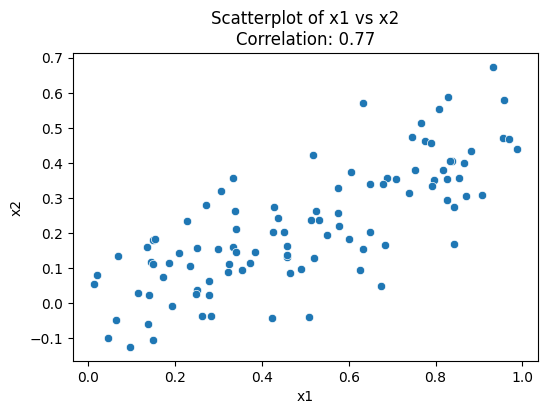

0.772324497691354

In [15]:
#14b
correlation_x1_x2 = np.corrcoef(x1, x2)[0, 1]

plt.figure(figsize=(6, 4))
sns.scatterplot(x=x1, y=x2)
plt.title(f'Scatterplot of x1 vs x2\nCorrelation: {correlation_x1_x2:.2f}')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()
correlation_x1_x2
# The correlation between x1 and x2 is 0.773.

In [16]:
#14c
X_full = sm.add_constant(np.column_stack((x1, x2)))
model_full = sm.OLS(y, X_full).fit()

In [17]:
#14d
X_x1 = sm.add_constant(x1)
model_x1 = sm.OLS(y, X_x1).fit()

In [18]:
#14e
X_x2 = sm.add_constant(x2)
model_x2 = sm.OLS(y, X_x2).fit()

# Summarize results for models
full_summary = model_full.summary()
x1_summary = model_x1.summary()
x2_summary = model_x2.summary()

# Display results for the full model, x1-only model, and x2-only model
print(f'Correlation between x1 and x2: {correlation_x1_x2:.2f}')
print("\nFull model (x1 and x2):\n", full_summary)
print("\nModel with only x1:\n", x1_summary)
print("\nModel with only x2:\n", x2_summary)

Correlation between x1 and x2: 0.77

Full model (x1 and x2):
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           5.76e-08
Time:                        03:48:03   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

14f
Yes, they contradict each other because in (c) the null hypothesis is not rejected for x2, despite being significant in (e). When fitted seperately, they both seem to be significant, but fitted together shows that x2 is not significant.

In [19]:
#14g
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

# (c) refitted
X_full_new = sm.add_constant(np.column_stack((x1, x2)))
model_full_new = sm.OLS(y, X_full_new).fit()

# (d) refitted
X_x1_new = sm.add_constant(x1)
model_x1_new = sm.OLS(y, X_x1_new).fit()

# (e) refitteed
X_x2_new = sm.add_constant(x2)
model_x2_new = sm.OLS(y, X_x2_new).fit()

full_new_summary = model_full_new.summary()
x1_new_summary = model_x1_new.summary()
x2_new_summary = model_x2_new.summary()

print("new x1 and x2:\n", full_new_summary)

new x1 and x2:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           4.60e-08
Time:                        03:48:07   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0618      0.192    

In [20]:
print("\ new x1:\n", x1_new_summary)

\ new x1:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           9.23e-07
Time:                        03:48:07   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0739      0.201     10.3

In [21]:
print("\ new x2:\n", x2_new_summary)

\ new x2:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           3.13e-08
Time:                        03:48:07   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2840      0.151     15.0

14g
The new observations of x1 and x2 change the coefficients. x1 is close to a 0.05 p-value , while x2 has a p-value of 0.069. x1 has marginal significance and x2 has high significance.

The new observations of x1 increases its coefficient. x1 now has a p-value of 0, which is close to a 0.05 p-value. x1 has high significance.

The new observations of x2 increases its coefficient. x2 now has a p-value of 0, which is close to a 0.05 p-value. x2 has high significance.